In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df =pd.read_csv("Food-Truck-LineReg.csv",header=None)

In [3]:
print(df)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [4]:
x=df.iloc[:,0].tolist()
y=df.iloc[:,1].tolist()

In [5]:
# from sklearn.model_selection import train_test_split
# x,x_test,y,y_test=train_test_split(X,Y,test_size=0.2,random_state=111)

In [6]:
x_sum=0
y_sum=0
x_sum_sq=0
y_sum_sq=0
xy_sum=0
n=len(x)
xy=[None]*n
for i in range(n):
    x_sum+=x[i]
    y_sum+=y[i]
    x_sum_sq+=(x[i]**2)
    y_sum_sq+=(x[i]**2)
    xy_sum+=x[i]*y[i]
    xy[i]=x[i]*y[i]
x_mean=x_sum/n
y_mean=y_sum/n
xy_mean=xy_sum/n


In [13]:
df.corr()

,0,1
0,1.000000,0.837873
1,0.837873,1.000000


In [7]:
x_std=0
y_std=0
for i in range(n):
    x_std+=((x[i]-x_mean)**2)
    y_std+=((y[i]-y_mean)**2)
x_std=(x_std/n)**(1/2)
y_std=(y_std/n)**(1/2)

In [8]:
r=(xy_sum)/((x_sum_sq* y_sum_sq)**1/2)

In [9]:

m=((n*xy_sum)-(x_sum*y_sum))/((n*x_sum_sq)-((x_sum)**2))
print(m)
c=y_mean-(m*x_mean)
print(c)
# c=(((y_sum)*(x_sum_sq))-((x_sum)(xy_sum)))/((n*x_sum_sq)-((x_sum)**2))
# print(c)

1.1930336441895992
-3.8957808783119043


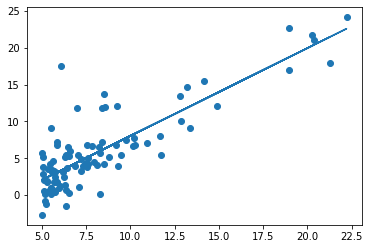

In [10]:
y_pred=list()
for i in range(0,n):
    y_pred.append((m*x[i]+c))
plt.plot(x,y_pred)
plt.scatter(x,y)

In [11]:
SST=0
SSE=0
SSR=0
MSE=0
# m=len(X)
for i in range(0,n):
    SST+=((y[i]-y_mean)**2)
    SSE+=((y[i]-y_pred[i])**2)
    SSR+=((y_pred[i]-y_mean)**2)
MSE=SST/m
cost=pow(MSE,(1/2))
R2=SSR/SST
print("SST :{}\n SSE :{}\nSSR:{}\n MSE:{}\n COST:{}\n R2:{}".format(SST,SSE,SSR,MSE,cost,R2))

SST :2914.8470516572247
 SSE :868.532446939185
SSR:2046.3146047180594
 MSE:2443.222842753286
 COST:49.42896764806328
 R2:0.7020315537841464


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
reg = LinearRegression()
x_arr = np.array(x)
y_arr = np.array(y)
reg.fit(x_arr.reshape(-1,1), y_arr)
print(reg.intercept_)
print(reg.coef_)

-3.895780878311852
[1.19303364]
